In [1]:
import numpy as np #resim üzerinden bir parça alıp onu mask ile çarpabilir toplayabilir herhangibir işleme tabi tutabiliriz.
import matplotlib.pyplot as plt
mask_0=np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)
mask_0=(mask_0)/9
mask_1=np.random.randint(5,size=9).reshape(3,3)
mask_2=np.random.randint(5,size=9).reshape(3,3)
print(mask_1)
print("------------")
print(mask_2)
print("------------")
print(mask_1*mask_2)
print("------------")
print(mask_1*mask_0)

[[4 0 2]
 [1 2 4]
 [2 2 2]]
------------
[[2 0 3]
 [1 2 3]
 [2 2 4]]
------------
[[ 8  0  6]
 [ 1  4 12]
 [ 4  4  8]]
------------
[[0.44444444 0.         0.22222222]
 [0.11111111 0.22222222 0.44444444]
 [0.22222222 0.22222222 0.22222222]]


In [2]:
def get_distance(v,w=[1/3,1/3,1/3]):   #w ağırlık değeri
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    #d=((a*w1)**2+(b*w2)**2+(c*w3)**2)**.5 #sqrt işlemi var
    d=((a**2)*w1+(b**2)*w2+(c**2)*w3)**.5
    return d

def convert_rgb_to_gray_level(im_1):
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im_2[i,j]=get_distance(im_1[i,j,:])
    return im_2

In [4]:
sum(sum(mask_1*mask_0))

2.111111111111111

In [5]:
def get_default_mask_for_mean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9
def apply_mask(part_of_image):
    mask=get_default_mask_for_mean()
    return np.average(part_of_image)

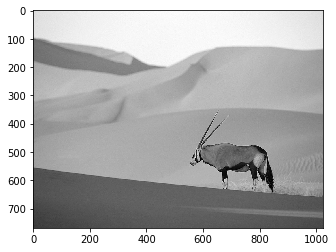

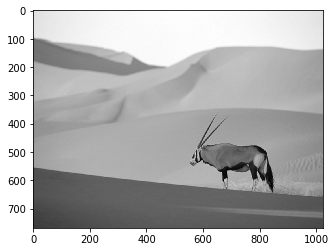

In [10]:
im1=plt.imread("1.jpg")       #ortalama ile yapılan örnek
im1=convert_rgb_to_gray_level(im1)
plt.imshow(im1,cmap='gray')
plt.show()
m=im1.shape[0]
n=im1.shape[1]
im2=np.zeros((m,n))
for i in range(1,m):
    for j in range(1,n):
        poi=im1[i-1:i+2,j-1:j+2]
        im2[i,j]=apply_mask(poi)    #part of image = poi

plt.imshow(im2,cmap='gray')
plt.show()

In [8]:
mask_1=np.random.randint(5,size=9).reshape(3,3)
mask_1

array([[1, 1, 2],
       [4, 0, 4],
       [3, 1, 4]])

In [7]:
mask_1[:,0:1]

array([[4],
       [1],
       [2]])

In [12]:
im2[3:6,10:13]

array([[205.79680867, 205.91182791, 205.69373535],
       [205.58069354, 205.69550888, 205.25516491],
       [205.35861924, 205.69551495, 205.14413959]])

In [28]:
s_1=im2[3:6,10:13].reshape(9)

In [30]:
s_1.sort()
s_1[5]

205.69550887813665

In [35]:
def get_median(poi):
    s_1=poi.reshape(1,9)
    s_1.sort()
    return s_1[0,4]

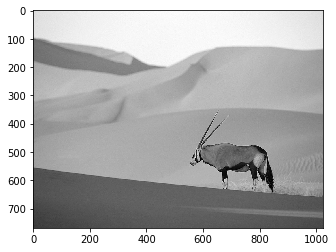

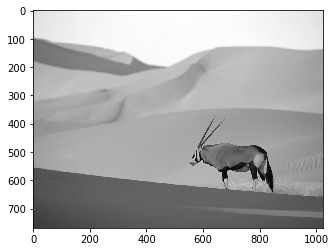

In [36]:
im1=plt.imread("1.jpg")   # ortanca ile yapılan örnek
im1=convert_rgb_to_gray_level(im1)
plt.imshow(im1,cmap='gray')
plt.show()
m=im1.shape[0]
n=im1.shape[1]
im2=np.zeros((m,n))
for i in range(1,m-1):
    for j in range(1,n-1):
        poi=im1[i-1:i+2,j-1:j+2]
        im2[i,j]=get_median(poi)    #part of image = poi

plt.imshow(im2,cmap='gray')
plt.show()